5.1. Streamlit deploy 

Through this Colab notebook, we are going to deploy Streamlit app in order to have a frontend envirorment in which we can drag files and search similar pics.

For Streamlit deploying in GColab ngrok (https://www.ngrok.com) is required. Ngrok provides a secure tunnel to cast a public url which connects with your local port used to run Streamlit app.

Once the registration in ngrock is done, we can get the authtoken to activate ngrok.






In [1]:
#Firstly, let's install streamlit and ngrok in our gcolab runtime
!pip install streamlit
!pip install pyngrok

     |████████████████████████████████| 8.2MB 5.2MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 163kB 40.9MB/s 
     |████████████████████████████████| 112kB 41.5MB/s 
     |████████████████████████████████| 4.2MB 20.1MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 122kB 30.7MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=9e78ef92fb807413906ede891432c1c173c10e0d9f515c92980d678198a9005a
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.4 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 747kB 5.0MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=af8365892e40c9d3de64c2aa9e2f188fb2b27962db201f81c8d67048c960055a
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [15]:
import pyngrok

In [14]:
#ngrok activation 
!ngrok authtoken 1s4lkbDtBIFjCYIzmrt4epkCu8b_5YHYDBH7FJkD9jx8sTvaH

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [3]:
import os
import numpy as np
import pandas as pd
import pickle
import tensorflow
from keras import models
from keras.models import model_from_json
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import streamlit as st
import cv2
import numpy as np

In [4]:
#Mount Gdrive in order to access to session.pkl and keras model 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import dill
dill.load_session('/content/drive/MyDrive/session.pkl')

5.2. Plot function to use in Streamlit

We will declare a function which will be used within Streamlit app. This function will plot 5 similar images, as similar_predict_plot function of '04_Feature_extraction.ipynb' but including the model loading inside

In [6]:
def similar_five_prediction(path):
  sample_image_path = path
  
  img_dim = (28,28,1)
  model = models.load_model('/content/drive/MyDrive/saved_model/model_4.h5')
  image_to_predict = load_img(sample_image_path, target_size=img_dim)
  image_to_predict_tensor = img_to_array(image_to_predict)
  image_to_predict_tensor /= 255.
  image_to_predict_tensor = cv2.cvtColor(image_to_predict_tensor,cv2.COLOR_RGB2GRAY)
  image_to_predict_tensor = np.reshape(image_to_predict_tensor, (1,28,28,1))
  prediction = np.argmax(model.predict(image_to_predict_tensor))
  global_prediction = model.predict(Xtest)
  n_cols = 5
  labels = []
  for i in range(n_cols):
    for j in range(0, len(Xtest)):
        if  prediction == np.argmax(global_prediction[j]):
          labels.append(j)
          i+=1
                    
  f, ax = plt.subplots(1, 5, figsize=(10,10))
  for n in range(5):
    ax[n].imshow(Xtest[labels[n]].reshape(28,28)) 


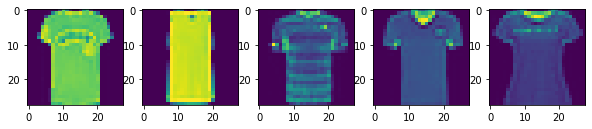

In [ ]:
similar_five_prediction('/content/drive/MyDrive/Images_sample_test/whiteblckbg1.png')

In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/Python_Modules')

5.3. Streamlit App

Since all resources that needed to be called within Streamlit app must be available in current Colab session or in gdrive, let's improve similar_five_prediction doing pickle of Xtest imageset and calling the model. Also all corresponding imports should be within it. 

This way img_search.py module is declared and stored in colab session.

In [7]:
import pickle
with open('test_pickle', 'wb') as f:
    pickle.dump(Xtest, f)

Let's write 'develop' .py files to create Streamlit app which will be differentiated between production files.

In [19]:
%%writefile app_develop.py
import streamlit
from PIL import Image
from img_search_develop import similar_five_prediction

def run():
  streamlit.title('Fashion Items Image Search')
  uploaded_file = streamlit.file_uploader("Choose an image of clothing and search five similar", type=["png", "jpg"])
  if uploaded_file is not None:
    img = Image.open(uploaded_file)
    streamlit.image(img, caption='Uploaded pic.', use_column_width=True)
  if streamlit.button('Search five similar pics'):
    similar_five_prediction(img)
    streamlit.pyplot
if __name__=='__main__':
  run()

Overwriting app_develop.py


In [20]:
%%writefile img_search_develop.py
import os
import numpy as np
import pandas as pd
import pickle
import tensorflow
from keras import models
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import dill
import pickle
import streamlit


def similar_five_prediction(image):
  
  with open('test_pickle', 'rb') as f:
    test_arr = pickle.load(f)
  img_dim = (28,28)
  model = models.load_model('/content/drive/MyDrive/saved_model/model_4.h5')
  image = ImageOps.fit(image, img_dim, Image.ANTIALIAS)
  image_to_predict_tensor = img_to_array(image)
  image_to_predict_tensor /= 28
  image_to_predict_tensor = cv2.cvtColor(image_to_predict_tensor,cv2.COLOR_RGB2GRAY)
  image_to_predict_tensor = np.reshape(image_to_predict_tensor, (1,28,28,1))
  prediction = np.argmax(model.predict(image_to_predict_tensor))
  global_prediction = model.predict(test_arr)
  n_cols = 5
  labels = []
  for i in range(n_cols):
    for j in range(0, len(test_arr)):
        if  prediction == np.argmax(global_prediction[j]):
          labels.append(j)
          i+=1
                    
  fig, ax = plt.subplots(1, 5, figsize=(10,10))
  
  for n in range(5):
    ax[n].imshow(test_arr[labels[n]].reshape(28,28)) 
    ax[n].axis("off")
  streamlit.pyplot(fig)

Overwriting img_search_develop.py


Finally, Streamlit app will be run in port 80 and ngrok will connect this local port to cast the public url

In [21]:
!streamlit run --server.port 80 app_develop.py &>/dev/null&

In [18]:
from pyngrok import ngrok
public_url = ngrok.connect(port='80')
public_url

2021-05-12 00:30:39.475 INFO    pyngrok.ngrok: Opening tunnel named: http-80-9b104128-1a4b-4483-ba00-d693d45ae4cd
2021-05-12 00:30:39.481 INFO    pyngrok.process.ngrok: t=2021-05-12T00:30:39+0000 lvl=info msg=start pg=/api/tunnels id=8a17e697a1aa5254
2021-05-12 00:30:39.555 INFO    pyngrok.process.ngrok: t=2021-05-12T00:30:39+0000 lvl=info msg="started tunnel" obj=tunnels name="http-80-9b104128-1a4b-4483-ba00-d693d45ae4cd (http)" addr=http://localhost:80 url=http://43354c456eb3.ngrok.io
2021-05-12 00:30:39.559 INFO    pyngrok.process.ngrok: t=2021-05-12T00:30:39+0000 lvl=info msg="started tunnel" obj=tunnels name=http-80-9b104128-1a4b-4483-ba00-d693d45ae4cd addr=http://localhost:80 url=https://43354c456eb3.ngrok.io
2021-05-12 00:30:39.562 INFO    pyngrok.process.ngrok: t=2021-05-12T00:30:39+0000 lvl=info msg=end pg=/api/tunnels id=8a17e697a1aa5254 status=201 dur=75.110018ms
2021-05-12 00:30:39.564 INFO    pyngrok.process.ngrok: t=2021-05-12T00:30:39+0000 lvl=info msg=start pg="/api/tun

<NgrokTunnel: "http://43354c456eb3.ngrok.io" -> "http://localhost:80">

In [ ]:
#Requirements.txt download
!pip3 freeze > requirements.txt